In [52]:
#importing the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as bs
import urllib.request as request
import nltk


### step 1. Loading the raw HTML webpage code in the notebook

In [22]:
response = request.urlopen('http://php.net/')
html = response.read()
page_soup = bs(html,"html5lib")
#page_soup

### step 2. Searching and navigating through the parse tree

In [33]:
# parsing the header content of each section in the webpage.

text_web =[] # a list which will contain all the text of the website

containers=page_soup.findAll('header',{'class':'title'})

for container in containers:
    inner_containers=container.findAll('a')
    for inner_container in inner_containers:
        text_web.append(inner_container.text)

In [34]:
# parsing the content of each section in the webpage.

containers=page_soup.findAll('div',{'class':'newscontent'})

for container in containers:
    inner_containers=container.findAll('p')
    for inner_container in inner_containers:
        text_web.append(inner_container.text)
   

In [38]:
text_web[40:45]

['\n        Please carefully test this version and report any issues found in the bug reporting system.\n      ',
 '\n        THIS IS A DEVELOPMENT PREVIEW - DO NOT USE IT IN PRODUCTION!\n      ',
 '\n        For more information on the new features and other changes, you can read the\n        NEWS file,\n        or the UPGRADING\n        file for a complete list of upgrading notes. Internal changes are listed in the\n        UPGRADING.INTERNALS file.\n        These files can also be found in the release archive.\n      ',
 '\n        The next release would be RC5, planned for November 8th.\n      ',
 '\n        The signatures for the release can be found in the manifest\n        or on the QA site.\n      ']

### step 3. cleaning the text extracted from web scraping

In [42]:
web_text=''
for text in text_web:
    web_text=web_text+' '+text

web_text[0:1000]

' PHP 7.1.24 Released PHP 7.2.12 Released PHP 7.3.0RC5 Released PHP 7.3.0RC4 Released PHP 7.1.23 Released PHP 7.2.11 Released PHP 7.3.0RC3 Released PHP 7.3.0RC2 Released PHP 5.6.38 Released PHP 7.1.22 Released PHP 7.3.0RC1 Released PHP 7.3.0.beta3 Released PHP 7.3.0.beta2 Released PHP 7.3.0.beta1 Released PHP 7.3.0alpha4 Released PHP 7.3.0 alpha 3 Released PHP 7.3.0 alpha 2 Released PHP 7.3.0 alpha 1 Released PHP 7.2.2 Released PHP 7.2.0 Release Candidate 4 Released PHP 7.2.0 Release Candidate 3 Released PHP 7.2.0 Release Candidate 1 Released PHP 7.2.0 Beta 3 Released PHP 7.2.0 Alpha 3 Released The PHP development team announces the immediate availability of PHP 7.1.24.\n     This is a bugfix release. All PHP 7.1 users are encouraged to upgrade to this version. For source downloads of PHP 7.1.24 please visit our downloads page,\n     Windows source and binaries can be found on windows.php.net/download/.\n     The list of changes is recorded in the ChangeLog.\n      The PHP development 

In [45]:
# since there are too many new line character in the web_text so we will remove it 
web_text=web_text.replace('\n','')
web_text[0:1000]

' PHP 7.1.24 Released PHP 7.2.12 Released PHP 7.3.0RC5 Released PHP 7.3.0RC4 Released PHP 7.1.23 Released PHP 7.2.11 Released PHP 7.3.0RC3 Released PHP 7.3.0RC2 Released PHP 5.6.38 Released PHP 7.1.22 Released PHP 7.3.0RC1 Released PHP 7.3.0.beta3 Released PHP 7.3.0.beta2 Released PHP 7.3.0.beta1 Released PHP 7.3.0alpha4 Released PHP 7.3.0 alpha 3 Released PHP 7.3.0 alpha 2 Released PHP 7.3.0 alpha 1 Released PHP 7.2.2 Released PHP 7.2.0 Release Candidate 4 Released PHP 7.2.0 Release Candidate 3 Released PHP 7.2.0 Release Candidate 1 Released PHP 7.2.0 Beta 3 Released PHP 7.2.0 Alpha 3 Released The PHP development team announces the immediate availability of PHP 7.1.24.     This is a bugfix release. All PHP 7.1 users are encouraged to upgrade to this version. For source downloads of PHP 7.1.24 please visit our downloads page,     Windows source and binaries can be found on windows.php.net/download/.     The list of changes is recorded in the ChangeLog.      The PHP development team ann

In [48]:
# substitute all tabs, newlines and other "whitespace-like" characters with single whitespace character
import re

web_text=re.sub( '\s+', ' ', web_text ).strip()
web_text[0:1000]

'PHP 7.1.24 Released PHP 7.2.12 Released PHP 7.3.0RC5 Released PHP 7.3.0RC4 Released PHP 7.1.23 Released PHP 7.2.11 Released PHP 7.3.0RC3 Released PHP 7.3.0RC2 Released PHP 5.6.38 Released PHP 7.1.22 Released PHP 7.3.0RC1 Released PHP 7.3.0.beta3 Released PHP 7.3.0.beta2 Released PHP 7.3.0.beta1 Released PHP 7.3.0alpha4 Released PHP 7.3.0 alpha 3 Released PHP 7.3.0 alpha 2 Released PHP 7.3.0 alpha 1 Released PHP 7.2.2 Released PHP 7.2.0 Release Candidate 4 Released PHP 7.2.0 Release Candidate 3 Released PHP 7.2.0 Release Candidate 1 Released PHP 7.2.0 Beta 3 Released PHP 7.2.0 Alpha 3 Released The PHP development team announces the immediate availability of PHP 7.1.24. This is a bugfix release. All PHP 7.1 users are encouraged to upgrade to this version. For source downloads of PHP 7.1.24 please visit our downloads page, Windows source and binaries can be found on windows.php.net/download/. The list of changes is recorded in the ChangeLog. The PHP development team announces the immedia

In [49]:
# converting all upper case to lower cased.
web_text=web_text.lower()
web_text[0:1000]

'php 7.1.24 released php 7.2.12 released php 7.3.0rc5 released php 7.3.0rc4 released php 7.1.23 released php 7.2.11 released php 7.3.0rc3 released php 7.3.0rc2 released php 5.6.38 released php 7.1.22 released php 7.3.0rc1 released php 7.3.0.beta3 released php 7.3.0.beta2 released php 7.3.0.beta1 released php 7.3.0alpha4 released php 7.3.0 alpha 3 released php 7.3.0 alpha 2 released php 7.3.0 alpha 1 released php 7.2.2 released php 7.2.0 release candidate 4 released php 7.2.0 release candidate 3 released php 7.2.0 release candidate 1 released php 7.2.0 beta 3 released php 7.2.0 alpha 3 released the php development team announces the immediate availability of php 7.1.24. this is a bugfix release. all php 7.1 users are encouraged to upgrade to this version. for source downloads of php 7.1.24 please visit our downloads page, windows source and binaries can be found on windows.php.net/download/. the list of changes is recorded in the changelog. the php development team announces the immedia

In [51]:
# so finally our clean extracted text from website is 

web_text[0:1000]

'php 7.1.24 released php 7.2.12 released php 7.3.0rc5 released php 7.3.0rc4 released php 7.1.23 released php 7.2.11 released php 7.3.0rc3 released php 7.3.0rc2 released php 5.6.38 released php 7.1.22 released php 7.3.0rc1 released php 7.3.0.beta3 released php 7.3.0.beta2 released php 7.3.0.beta1 released php 7.3.0alpha4 released php 7.3.0 alpha 3 released php 7.3.0 alpha 2 released php 7.3.0 alpha 1 released php 7.2.2 released php 7.2.0 release candidate 4 released php 7.2.0 release candidate 3 released php 7.2.0 release candidate 1 released php 7.2.0 beta 3 released php 7.2.0 alpha 3 released the php development team announces the immediate availability of php 7.1.24. this is a bugfix release. all php 7.1 users are encouraged to upgrade to this version. for source downloads of php 7.1.24 please visit our downloads page, windows source and binaries can be found on windows.php.net/download/. the list of changes is recorded in the changelog. the php development team announces the immedia

### step 4. using nltk library to tokenize and find the frequecy dist. for each words and visualization

In [55]:
import nltk
nltk.download('reuters')

[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...


True

In [71]:
from nltk.tokenize import word_tokenize,sent_tokenize

word_tokens=[] # to store the word tokens

# converting to sentence tokenize and then word tokenize
for sentence in sent_tokenize(web_text):
    for word in word_tokenize(sentence):
        word_tokens.append(word)
        
word_tokens[:20] # printing the first 50 word tokens from the string

['php',
 '7.1.24',
 'released',
 'php',
 '7.2.12',
 'released',
 'php',
 '7.3.0rc5',
 'released',
 'php',
 '7.3.0rc4',
 'released',
 'php',
 '7.1.23',
 'released',
 'php',
 '7.2.11',
 'released',
 'php',
 '7.3.0rc3']

In [75]:
# calculating the frequency distribution of each words
counts=nltk.FreqDist(word_tokens)
counts

FreqDist({'the': 292, '.': 189, 'php': 161, 'for': 103, 'of': 95, 'in': 91, 'release': 89, ',': 78, 'can': 74, 'be': 69, ...})

In [82]:
# printing the top 10 words with the maximum frequency
counts.most_common(10)

[('the', 292),
 ('.', 189),
 ('php', 161),
 ('for', 103),
 ('of', 95),
 ('in', 91),
 ('release', 89),
 (',', 78),
 ('can', 74),
 ('be', 69)]

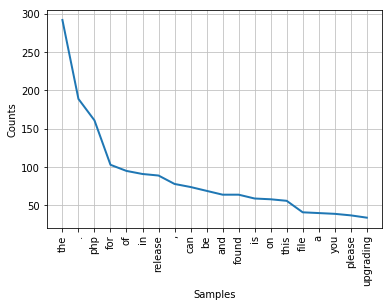

In [84]:
# plotting frequency of 20 most common words
counts.plot(20)

## observation:-
### we can clearly visualize from the graph that word 'the' has the highest frequency followed by '.' and 'php'.
